In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points

In [3]:
rent = pd.read_json('train.json')
rent.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [4]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


When the data is very wide like this, sometimes it makes sense to show the transpose for the first few records:

In [5]:
rent.head(3).T

,4,6,9
bathrooms,1,1,1
bedrooms,1,2,2
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712,cd759a988b8f23924b5a2058d5ab2b49
created,2016-06-16 05:55:27,2016-06-01 05:44:33,2016-06-14 15:19:59
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...
display_address,145 Borinquen Place,East 44th,East 56th Street
features,"[Dining Room, Pre-War, Laundry in Building, Di...","[Doorman, Elevator, Laundry in Building, Dishw...","[Doorman, Elevator, Laundry in Building, Laund..."
latitude,40.7108,40.7513,40.7575
listing_id,7170325,7092344,7158677
longitude,-73.9539,-73.9722,-73.9625


###### Firstly check if there are any missing data in our dataset

In [6]:
rent.isnull().any()

bathrooms          False
bedrooms           False
building_id        False
created            False
description        False
display_address    False
features           False
latitude           False
listing_id         False
longitude          False
manager_id         False
photos             False
price              False
street_address     False
interest_level     False
dtype: bool

We don't have missing data in our dataset but that there may be some values that were not physically missing but have sentinel values that indicate missing

By observing the data there are 3 columns which can be transormed features, photos are in list and interest_level seems categorical value. Because we read in the data with JSON and not CSV, pandas has created actual list objects for us, since that is how they were represented in JSON format. So these are not stored as strings but as lists. Anything nonnumeric, pandas stores as "Object":

In [7]:
rent['features'].head(3)

4    [Dining Room, Pre-War, Laundry in Building, Di...
6    [Doorman, Elevator, Laundry in Building, Dishw...
9    [Doorman, Elevator, Laundry in Building, Laund...
Name: features, dtype: object

In [8]:
rent['photos'].head(3)

4    [https://photos.renthop.com/2/7170325_3bb5ac84...
6    [https://photos.renthop.com/2/7092344_7663c19a...
9    [https://photos.renthop.com/2/7158677_c897a134...
Name: photos, dtype: object

In [9]:
rent['interest_level'].head(3)

4    medium
6       low
9    medium
Name: interest_level, dtype: object

###### Identifying categorical values and converting them to proper datatype

In [10]:
rent['interest_level'].unique()  # yep, looks like an ordinal categorical

array(['medium', 'low', 'high'], dtype=object)

In [11]:
rent['interest_level'] = rent['interest_level'].astype('category') # convert datatype to categorical
rent['interest_level'] = rent['interest_level'].cat.as_ordered()   #Set the Categorical to be ordered
rent['interest_level'].head(5)

4     medium
6        low
9     medium
10    medium
15       low
Name: interest_level, dtype: category
Categories (3, object): [high < low < medium]

Once we have converted a column to be categorical, we can then access a group of functions via cat. Above, df_rent['interest_level'].cat.xxx accesses any category related functions or values (xxx) associated with that particular column. For example, here is how to get the integer representation for each category level

In [12]:
rent['interest_level'].cat.codes

4         2
6         1
9         2
10        2
15        1
         ..
124000    1
124002    2
124004    2
124008    2
124009    0
Length: 49352, dtype: int8

That category order doesn't look right so let's make sure that it goes from low to high. We want low=0, medium=1, high=2. The reason to do so is mainly for modeling purposes, but it's a good idea to be rigorous.

In [13]:
rent['interest_level'] = rent['interest_level'].cat.reorder_categories(['low','medium','high'])
rent['interest_level']

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 49352, dtype: category
Categories (3, object): [low < medium < high]

In [14]:
rent['interest_level'].cat.codes

4         1
6         0
9         1
10        1
15        0
         ..
124000    0
124002    1
124004    1
124008    1
124009    2
Length: 49352, dtype: int8

Now the categories are correctly mapped to 0, 1, and 2.

Categorical variables look like strings when we print them out, but they are stored very efficiently as the integer equivalents. Converting these strings to categorical variables is more important for machine learning, but it can also make queries faster or simpler for EDA purposes.

#### Basic exploration of numerical features

###### Uniqueness, counts, histograms

In [15]:
rent['bedrooms'].unique()

array([1, 2, 3, 0, 4, 5, 6, 8, 7], dtype=int64)

In [16]:
rent['bedrooms'].value_counts()

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [17]:
rent['bathrooms'].unique()

array([ 1. ,  1.5,  2. ,  0. ,  3. ,  4. ,  2.5,  4.5,  3.5,  5. ,  6. ,
        6.5,  5.5,  7. , 10. ])

In [18]:
rent['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [19]:
rent['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [20]:
rent['manager_id'].value_counts().head(5)

e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
Name: manager_id, dtype: int64

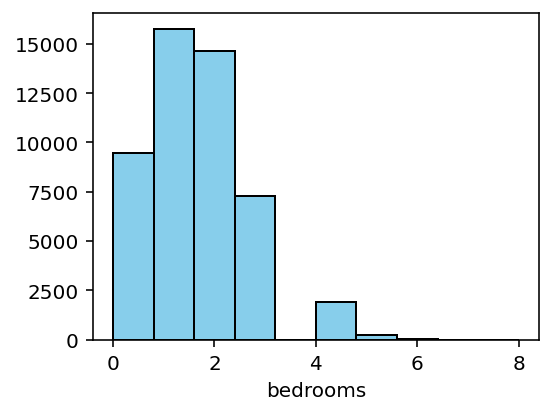

In [21]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(rent['bedrooms'],color = "skyblue",edgecolor='black', linewidth=1)
ax.set_xlabel("bedrooms")
plt.show()

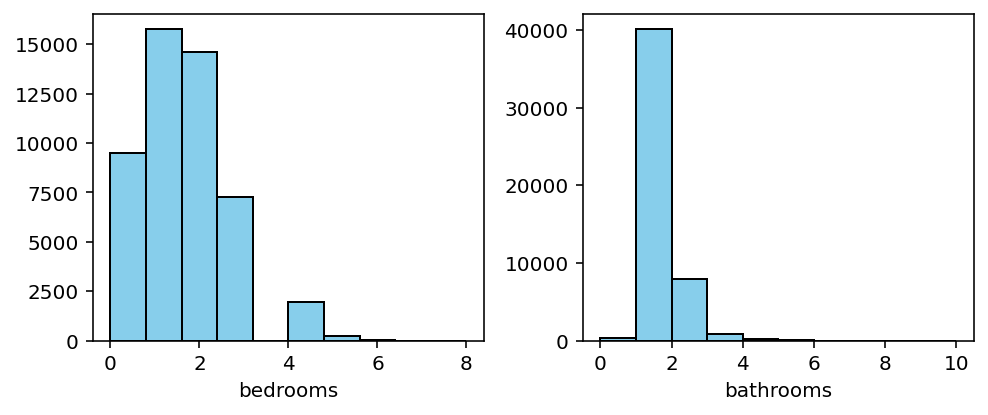

In [22]:
# Here's how you put two graphs side-by-side:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
axes[0].hist(rent['bedrooms'],color = "skyblue",edgecolor='black', linewidth=1)
axes[0].set_xlabel("bedrooms")
axes[1].hist(rent['bathrooms'],color = "skyblue",edgecolor='black', linewidth=1)
axes[1].set_xlabel("bathrooms")
plt.tight_layout() #  we need this to separate the plots!
plt.show()

Anomalies!
Look for any anomalies

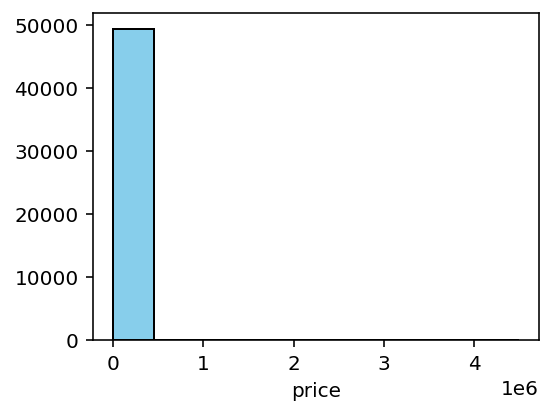

In [23]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(rent['price'],color = "skyblue",edgecolor='black', linewidth=1)
ax.set_xlabel("price")
plt.show()

Histogram show prices very strange

In [24]:
rent['price'].sort_values(ascending=False).head(10)

32611     4490000
12168     1150000
57803     1070000
55437     1070000
123877     135000
4620       111111
91709      100000
54148       90000
116586      85000
96905       80000
Name: price, dtype: int64

Some of the apartments cost over 1 million a month! That doesn't make any sense. How can this be?
People are putting their apartments for sale not rent on this website as well.

If we plot only those records with a maximum price of $10,000 we'll see something a little more interesting. Let's investigate by doing a query on the data frame. Recall that, given a series, the relational operators return a series of Boolean values:

In [25]:
rent[rent['price']<=10_000].head(2).T #We can then use that Boolean vector as an index on the data frame itself, which pandas interprets as selecting rows where the index value is true:

,4,6
bathrooms,1,1
bedrooms,1,2
building_id,8579a0b0d54db803821a35a4a615e97a,b8e75fc949a6cd8225b455648a951712
created,2016-06-16 05:55:27,2016-06-01 05:44:33
description,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
display_address,145 Borinquen Place,East 44th
features,"[Dining Room, Pre-War, Laundry in Building, Di...","[Doorman, Elevator, Laundry in Building, Dishw..."
latitude,40.7108,40.7513
listing_id,7170325,7092344
longitude,-73.9539,-73.9722


For convenience, let's get a new view of the data set by storing the resulting query data frame into a new variable. Then we can plot the histogram:

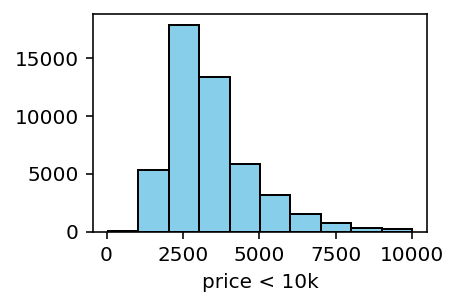

In [26]:
cheap = rent[rent['price']<=10_000]
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(cheap['price'],color = "skyblue",edgecolor='black', linewidth=1)
ax.set_xlabel("price < 10k")
plt.show()

In order to test more than one relational expression at once, we need to surround the operands with (...) and use the & operator for and. Use | for *ord.

In [27]:
rent[(rent['price'] <= 10_000) &
        (rent['price'] > 100)]['price'].sort_values()

117339      401
102756      695
113552      695
113599      695
85617       695
          ...  
119271    10000
55073     10000
6200      10000
3452      10000
102572    10000
Name: price, Length: 48472, dtype: int64

In [28]:
numphotos = rent['photos'].apply(len)
numphotos.sort_values(ascending =False).head(5)

32963    68
3411     60
2672     50
84898    46
85197    46
Name: photos, dtype: int64

Lets investigate record with most photos

In [29]:
rent[numphotos>60]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
32963,3.0,3,0,2016-06-25 02:54:01,"BACK TO SCHOOL ! FAMILY HOME, three BIG bedroo...",The Somerset 1365 York Avenue,"[Fitness Center, Childrens Playroom, Residents...",40.7674,7214466,-73.9538,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/7214466_4000a418...,7995,The Somerset 1365 York Avenue,low


There is no issue with the data except there are bunch of pictures on  the profile

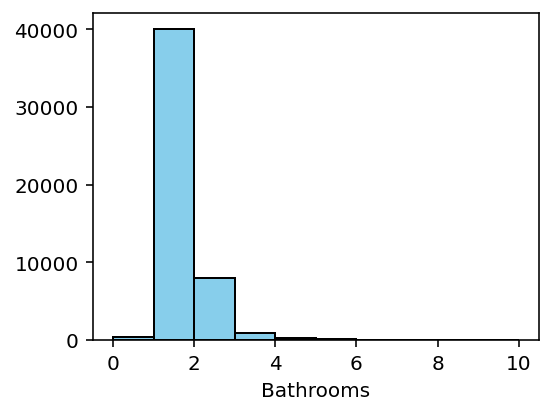

In [30]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(rent['bathrooms'],color = "skyblue",edgecolor='black', linewidth=1)
ax.set_xlabel("Bathrooms")
plt.show()

In [31]:
rent['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

Most of the places have single bath rooms lets plot bedrooms to evaluate the bed to bath ratio

In [32]:
rent[rent['bathrooms']>6].T

,26937,84566,104459
bathrooms,6.5,7,10
bedrooms,7,5,2
building_id,3be1175591e290053aa6997ac8f4e3bb,0,424f8014bddc288d26da5fe81d0bea02
created,2016-06-22 03:15:54,2016-04-07 17:06:29,2016-04-09 04:34:31
description,This landmark English stone manor sits majesti...,Extraordinary in every way. This single family...,***The building?s well-attended lobby welcomes...
display_address,206 Upper Mountain Avenu,West 9th St- High Class Townhome,W 52 St.
features,"[Garage, Garden, Doorman]",[],"[Doorman, Elevator, Fitness Center, Laundry in..."
latitude,40.8336,40.7335,40.7633
listing_id,7198431,6840943,6849204
longitude,-74.216,-73.9974,-73.9849


Place with 10 bathrooms have only 2 bedrooms and price is 3600 which is very unusal. The bedroom data must be faulty for this record as it is teh outlier.

### Digging deeper into the data

###### The relationship between features.

If I were trying to rent an apartment, I'd like to know what people are willing to pay for. That means we should look at the relationship between various features and rent price. Let's start out by blindly computing the correlation coefficient between bedrooms in price then bathrooms in price:

In [33]:
np.corrcoef(rent['bedrooms'], rent['price'])

array([[1.        , 0.05178807],
       [0.05178807, 1.        ]])

In [34]:
np.corrcoef(rent['bathrooms'], rent['price'])

array([[1.        , 0.06966123],
       [0.06966123, 1.        ]])

That is very strange. There's not seem to be a correlation, which is counterintuitive. Either our intuition is wrong or the data is wrong, or at least misleading. Recall that there are some apartments that are for sale rather than for rent so let's filter those out:

In [35]:
rent = rent[rent['price']<=10_000].copy() # make copy so we can modify below
len(rent)

48474

In [36]:
np.corrcoef(rent['bedrooms'], rent['price'])[0,1]

0.5596391219420092

In [37]:
np.corrcoef(rent['bathrooms'], rent['price'])[0,1]

0.6359309382693205

Now we can see the increase in correlations

It would appear that New Yorkers really care about bathrooms. Can we conclude that from these correlations?

Let's plot the relationship to see if anything pops up:

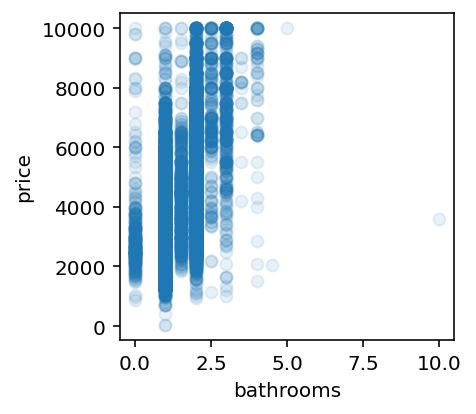

In [38]:
fig, ax = plt.subplots(figsize=(3,3))  # make one subplot (ax) on the figure
ax.scatter(rent['bathrooms'], rent['price'], alpha=.1)

ax.set_xlabel("bathrooms")
ax.set_ylabel("price")
plt.show()

Ok, we can see here that, for a given number of bathrooms, there is a wide range of rent prices: the vertical dots for any X location are widely spread out.

A better visualization would probably be a box plot or violin plot. In both cases, we need a list of values for each box or "violin", which we can do by selecting the price for all low, medium, and high interest levels:

In [39]:
low = rent[rent['interest_level']=='low']['price'].values
med = rent[rent['interest_level']=='medium']['price'].values
hi  = rent[rent['interest_level']=='high']['price'].values

Please explain the order of operations and the data type of each sub expression for the assignment to low.
Ok, and here's how to do the box and violin plot together:

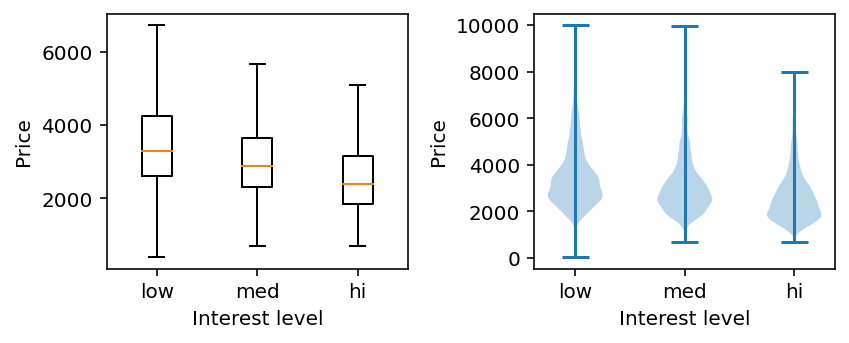

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2.5))  # make side-by-side plot

axes[0].boxplot([low, med, hi], showfliers=False) # don't show outliers
axes[0].set_xticks(range(1,3+1))
axes[0].set_xticklabels(['low','med','hi'])  # set labels on the X axis
axes[0].set_xlabel("Interest level")
axes[0].set_ylabel("Price")

axes[1].violinplot([low, med, hi])
axes[1].set_xticks(range(1,3+1))
axes[1].set_xticklabels(['low','med','hi'])  # set labels on the X axis
axes[1].set_xlabel("Interest level")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

From this, we can conclude that the highest interest concentration is for lower-priced apartments.

From matplotlib doc: "The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the [quartile] data."

Lets find correlation bet ween photos and price

In [41]:
np.corrcoef(rent['photos'].apply(len), rent['price'])[0,1]

0.1566814349526539

In [42]:
#### fig, ax = plt.subplots(figsize=(3,3))  # make one subplot (ax) on the figure
ax.scatter(rent['photos'].apply(len), rent['price'], alpha=.1)

ax.set_xlabel("photos")
ax.set_ylabel("price")
plt.show()

In [43]:
single = rent[rent['bedrooms']==1]['price'].values
double = rent[rent['bedrooms']==2]['price'].values
three  = rent[rent['bedrooms']==3]['price'].values

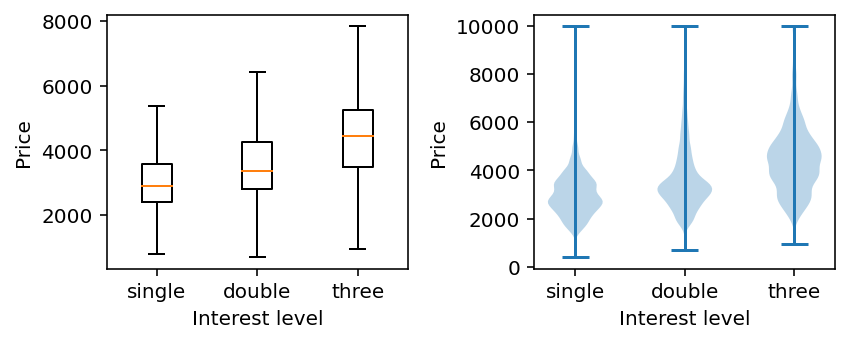

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2.5))  # make side-by-side plot

axes[0].boxplot([single, double, three], showfliers=False) # don't show outliers
axes[0].set_xticks(range(1,3+1))
axes[0].set_xticklabels(['single','double','three'])  # set labels on the X axis
axes[0].set_xlabel("Interest level")
axes[0].set_ylabel("Price")

axes[1].violinplot([single, double, three])
axes[1].set_xticks(range(1,3+1))
axes[1].set_xticklabels(['single','double','three'])  # set labels on the X axis
axes[1].set_xlabel("Interest level")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()

As we can observe that more the bedrooms highger the price. Avg price of single and double bedrooms is closer tham 3 bedroom apartment. 
Seems like 3 bedroom apartment has higher avg and higher price difference than one and two bed

##### Quick machine learning regression check

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = cheap[['bedrooms','bathrooms']]#,'latitude','longitude']]
y = cheap['price']

In [49]:
r = LinearRegression(normalize=True)
r.fit(X, y)
y_pred = r.predict(X)
print(f'y = {r.coef_[0]:.1f}*bedrooms + {r.coef_[1]:.1f}*bathrooms + {r.intercept_:.1f}')
print('R^2', r.score(X,y), "MAE", mean_absolute_error(y, y_pred))

y = 416.8*bedrooms + 1568.9*bathrooms + 966.4
R^2 0.479669828143114 MAE 751.3176496416129


For a unit increase in the number of bedrooms, the price is affected by 416.8 dollars and, similarly, a unit increase in the number of bathrooms affects the price by 1568.9. Of course this is on average and totally ignores any confounding variables, of which there are many. This is the big hazard when using regression to look at the relative importance of variables. (Warning: For some reason I'm getting the same coefficients when I normalize X and when I don't, which shouldn't happen. So, basically I'm not trusting the scale of the coefficients in relation to each other for feature importance purposes.)

To show you how easy it is to use a different, and more powerful, model let's use a random forest:

In [50]:
from sklearn.ensemble import RandomForestRegressor

X = cheap[['bedrooms','bathrooms','latitude','longitude']]

r = RandomForestRegressor(n_estimators=10) # only this line is different
r.fit(X, y)
y_pred = r.predict(X)
print('R^2', r.score(X,y), "MAE", mean_absolute_error(y, y_pred))

R^2 0.9430588154604673 MAE 191.868294206532


There is a small increase in accuracy, just by changing the model.

We can use something called permutation importance to get an idea of how important the various features are to prediction. The results more or less jive with what we found with linear regression, that bathrooms are more important than bedrooms in terms of price (on average).

In [51]:
from sklearn.inspection import permutation_importance

I = permutation_importance(r, X, y)
I['importances_mean']

array([0.58506166, 0.50696501, 0.53642381, 0.6140571 ])